In [ ]:
from google.colab import files

In [ ]:
import pandas as pd

In [ ]:
files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset (1).csv


{'credit_risk_dataset (1).csv': b'person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length\r\n22,59000,RENT,123,PERSONAL,D,35000,16.02,1,0.59,Y,3\r\n21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.1,N,2\r\n25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3\r\n23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2\r\n24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4\r\n21,9900,OWN,2,VENTURE,A,2500,7.14,1,0.25,N,2\r\n26,77100,RENT,8,EDUCATION,B,35000,12.42,1,0.45,N,3\r\n24,78956,RENT,5,MEDICAL,B,35000,11.11,1,0.44,N,4\r\n24,83000,RENT,8,PERSONAL,A,35000,8.9,1,0.42,N,2\r\n21,10000,OWN,6,VENTURE,D,1600,14.74,1,0.16,N,3\r\n22,85000,RENT,6,VENTURE,B,35000,10.37,1,0.41,N,4\r\n21,10000,OWN,2,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N,2\r\n23,95000,RENT,2,VENTURE,A,35000,7.9,1,0.37,N,2\r\n26,108160,RENT,4,EDUCATION,E,35000,18.39,1,0.32,N,4\r\n23,115000,RENT,2,EDUCATION,A,35000

In [ ]:
df = pd.read_csv('credit_risk_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
0,25473
1,7108


In [ ]:
df.columns[df.isnull().any()]

Index(['person_emp_length', 'loan_int_rate'], dtype='object')

In [ ]:
import matplotlib , matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
numeric_col = df.select_dtypes(['int64','float64']).columns

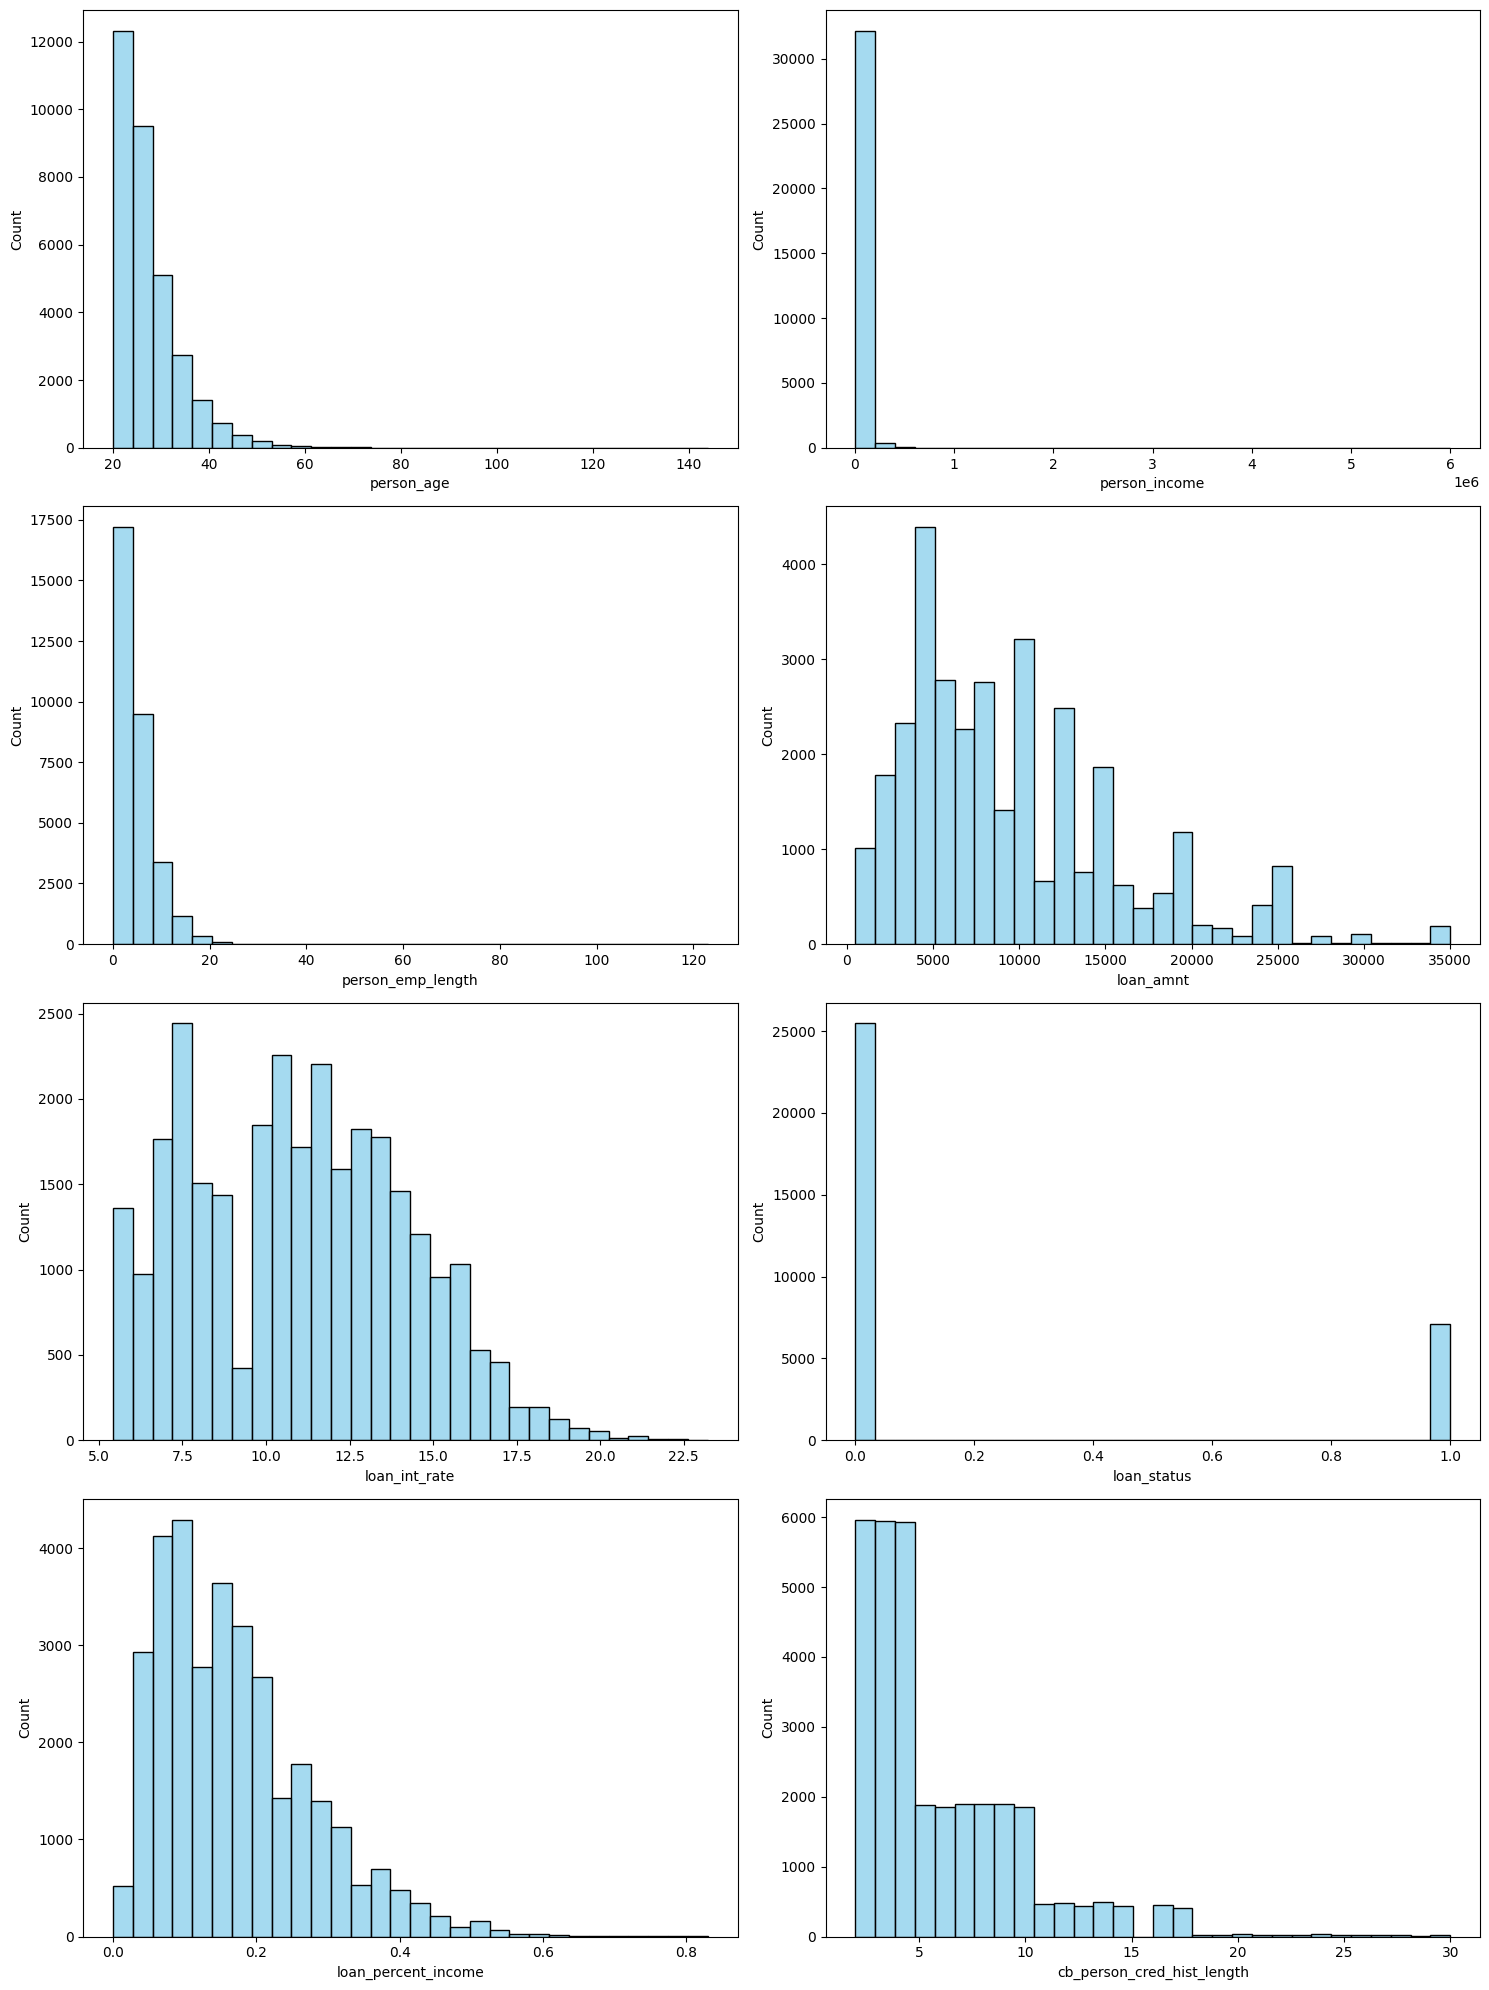

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Create bar plots for each numeric column
for col, ax in zip(numeric_col, axes.flatten()):
    sns.histplot(df[col], bins=30, kde=False, ax=ax, color='skyblue')

plt.tight_layout()
plt.show()

In [ ]:
#nulls imputation
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

<ipython-input-37-245d6f5c2f00>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
<ipython-input-37-245d6f5c2f00>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
print(df.dtypes)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [ ]:
object_columns = df.select_dtypes(include='object')

# Create a dictionary to hold the value counts for each object column
value_counts_dict = {}

for column in object_columns:
    value_counts_dict[column] = object_columns[column].value_counts()
print(value_counts_dict)

{'person_home_ownership': person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64, 'loan_intent': loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64, 'loan_grade': loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64, 'cb_person_default_on_file': cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64}


In [ ]:
print(object_columns.columns)

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


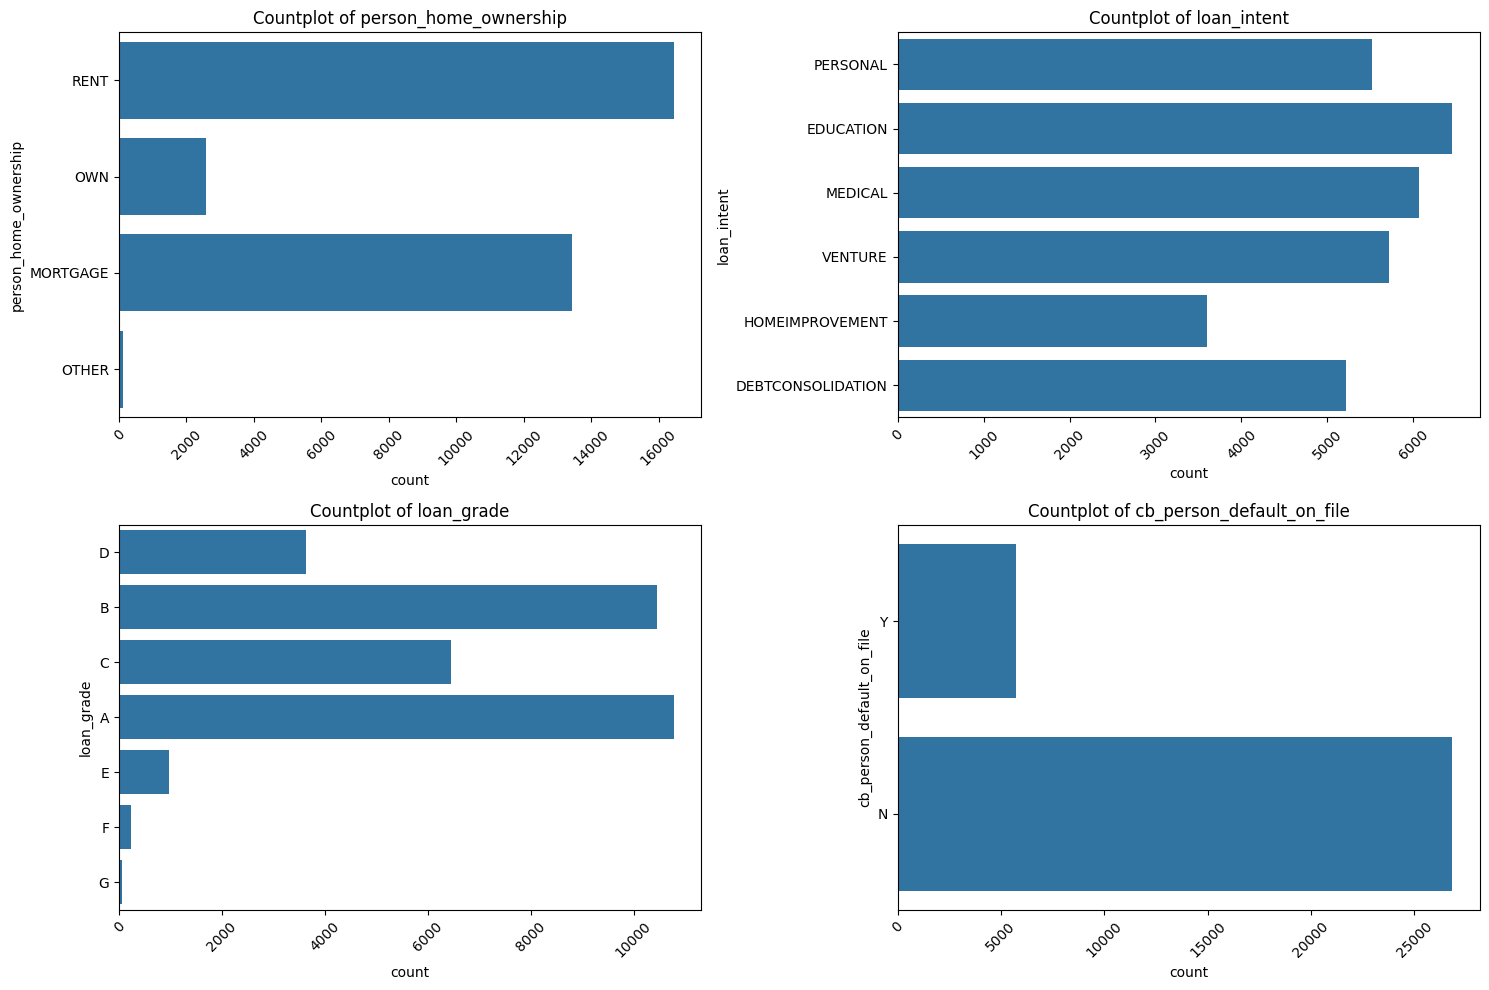

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for col, ax in zip(df.select_dtypes(include='object').columns, axes.flatten()):
    sns.countplot(df[col], ax=ax)
    ax.set_title(f'Countplot of {col}')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
print(numeric_col)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')


In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ['person_age', 'person_income', 'person_emp_length',
                       'loan_amnt', 'loan_int_rate', 'loan_status',
                       'loan_percent_income', 'cb_person_cred_hist_length']),

    (OneHotEncoder(sparse_output=False), ['person_home_ownership', 'loan_intent',
                                           'loan_grade'])
)
# Fit and transform the DataFrame
df_ct = ct.fit_transform(df)


In [ ]:
import numpy as np
num_feature_names = ['person_age', 'person_income', 'person_emp_length',
                     'loan_amnt', 'loan_int_rate', 'loan_status',
                     'loan_percent_income', 'cb_person_cred_hist_length']


ohe = ct.named_transformers_['onehotencoder']  # Get OneHotEncoder
cat_feature_names = ohe.get_feature_names_out(input_features=[
    'person_home_ownership',
    'loan_intent',
    'loan_grade'
])

# Combine feature names
feature_names = np.concatenate([num_feature_names, cat_feature_names])


In [ ]:
df_transformed = pd.DataFrame(df_ct, columns=feature_names)

In [ ]:
df_transformed['cb_person_default_on_file'] = df['cb_person_default_on_file'].values

In [ ]:
df_transformed['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0}).values

In [ ]:
df_transformed.head()
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32581 non-null  float64
 1   person_income                   32581 non-null  float64
 2   person_emp_length               32581 non-null  float64
 3   loan_amnt                       32581 non-null  float64
 4   loan_int_rate                   32581 non-null  float64
 5   loan_status                     32581 non-null  float64
 6   loan_percent_income             32581 non-null  float64
 7   cb_person_cred_hist_length      32581 non-null  float64
 8   person_home_ownership_MORTGAGE  32581 non-null  float64
 9   person_home_ownership_OTHER     32581 non-null  float64
 10  person_home_ownership_OWN       32581 non-null  float64
 11  person_home_ownership_RENT      32581 non-null  float64
 12  loan_intent_DEBTCONSOLIDATION   

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features and target
X_ = df_transformed.drop('loan_status', axis=1)
y_ = df_transformed['loan_status']

In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_, y_)

In [ ]:
# Combine the resampled features and target into a new DataFrame
df_resampled = X_resampled.copy()
df_resampled['loan_status'] = y_resampled

In [ ]:
print(Counter(y_resampled))

Counter({1.0: 25473, 0.0: 25473})


In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df_resampled.drop(columns=['cb_person_default_on_file'])
y = df_resampled['cb_person_default_on_file']

# Step 1: Split data into train + validation and test (e.g., 80% train + valid, 20% test)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split train + valid into separate training and validation sets (e.g., 70% train, 30% valid)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, classification_report

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score
import numpy as np

# Define the pipeline with a placeholder classifier
pipe = Pipeline([
    ('classifier', LogisticRegression())  # Placeholder, will be replaced during RandomizedSearchCV
])

# Revised parameter grid including only Logistic Regression
param_grid = [
    #{'classifier': [LogisticRegression()],
    # 'classifier__C': [0.01, 0.1, 1, 10, 100]}
    #{'classifier': [GradientBoostingClassifier()],
     #'classifier__learning_rate': [0.01, 0.1, 0.2],
     #'classifier__n_estimators': [50, 100, 150]}
    {'classifier': [RandomForestClassifier(n_estimators=500)],
     'classifier__max_features': [1, 2, 3]}
]

# Perform RandomizedSearchCV with the training data and validate with the validation data
random_search = RandomizedSearchCV(pipe, param_distributions=param_grid, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

# After tuning, evaluate the best model on the validation set
y_valid_pred = random_search.predict(X_valid)
validation_score = random_search.score(X_valid, y_valid)
validation_recall = recall_score(y_valid, y_valid_pred)
validation_precision = precision_score(y_valid, y_valid_pred)

# Get the best parameters and estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Finally, evaluate the model's performance on the test set
y_test_pred = best_estimator.predict(X_test)
test_score = best_estimator.score(X_test, y_test)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

# Print the results
print("Best Parameters:", best_params)
print("Validation Score:", validation_score)
print("Validation Recall:", validation_recall)
print("Validation Precision:", validation_precision)
print("Test Score:", test_score)
print("Test Recall:", test_recall)
print("Test Precision:", test_precision)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'classifier__hidden_layer_sizes': (50, 50), 'classifier__alpha': 0.0001, 'classifier': MLPClassifier(max_iter=1000)}
Validation Score: 0.8331534007262734
Validation Recall: 0.5694323144104804
Validation Precision: 0.6461843409316155
Test Score: 0.8386653581943081
Test Recall: 0.593167701863354
Test Precision: 0.6477713178294574


In [ ]:
# Create a pipeline without a preprocessing step
pipe = Pipeline([
    ('classifier', SVC())  # Placeholder, will be replaced during GridSearchCV
])

# Revised param_grid including all classifiers
param_grid = [
    {'classifier': [LogisticRegression()],
     'classifier__C': [0.01, 0.1, 1, 10, 100]},

    {'classifier': [SVC()],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},

    {'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': [3, 5, 7, 9],
     'classifier__weights': ['uniform', 'distance']},

    {'classifier': [DecisionTreeClassifier()],
     'classifier__max_depth': [None, 10, 20, 30],
     'classifier__min_samples_split': [2, 5, 10]},

    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'classifier__max_features': [1, 2, 3]},

    {'classifier': [GradientBoostingClassifier()],
     'classifier__learning_rate': [0.01, 0.1, 0.2],
     'classifier__n_estimators': [50, 100, 150]},

    {'classifier': [AdaBoostClassifier()],
     'classifier__n_estimators': [50, 100, 150],
     'classifier__learning_rate': [0.01, 0.1, 1]},

    {'classifier': [GaussianNB()]},  # Naive Bayes has no hyperparameters to tune in this case

    {'classifier': [MLPClassifier(max_iter=1000)],
     'classifier__alpha': [0.0001, 0.001, 0.01],
     'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)]}
]

# Perform GridSearchCV
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
!pip install mglearn
import mglearn.plots

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.1 MB/s eta 0:00:00
